<a href="https://colab.research.google.com/github/nathsmo/Victimas_PNC_2017/blob/master/Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Data Wrangling </center>
## <center> Nathalia Morales </center>
### <center> Proyecto final Elements of Machine Learning </center>

## Imporando las librerias necesarias

In [0]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split  
from pandas import DataFrame
import statsmodels.api as sm
import seaborn as sns

In [0]:
df = pd.read_excel('victimas_2017.xlsx')

## Forma General de la data

In [0]:
df.shape

(35169, 20)

In [0]:
df.columns

Index([u'núm_corre', u'año_ocu', u'mes_ocu', u'día_ocu', u'día_sem_ocu',
       u'hora_ocu', u'g_hora', u'g_hora_mañ.tar.noch', u'área_geo_ocu',
       u'depto_ocu', u'mupio_ocu', u'zona_ocu', u'sexo_per', u'edad_per',
       u'g_edad_60ymás', u'g_edad_80ymás', u'edad_quinquenales',
       u'menor_mayor', u'delito_com', u'g_delitos'],
      dtype='object')

In [0]:
df.head()

,núm_corre,año_ocu,mes_ocu,día_ocu,día_sem_ocu,hora_ocu,g_hora,g_hora_mañ.tar.noch,área_geo_ocu,depto_ocu,mupio_ocu,zona_ocu,sexo_per,edad_per,g_edad_60ymás,g_edad_80ymás,edad_quinquenales,menor_mayor,delito_com,g_delitos
0,1,2017,1,1,7,3,1,1,2,1,115,99,1,22,3,3,5,1,69,3
1,2,2017,1,1,7,19,4,3,2,2,207,99,1,24,3,3,5,1,69,3
2,3,2017,1,2,1,8,2,1,2,19,1901,99,1,35,6,6,8,1,75,3
3,4,2017,1,2,1,18,4,3,1,5,501,99,1,27,4,4,6,1,75,3
4,5,2017,1,2,1,12,3,2,2,10,1001,99,1,62,11,11,13,1,75,3


In [0]:
df[u'día_ocu']=df[u'día_ocu'].replace(99, np.nan)
df[u'hora_ocu']=df[u'hora_ocu'].replace(99, np.nan)
df[u'edad_per']=df[u'edad_per'].replace(999, np.nan)
df[u'sexo_per']=df[u'sexo_per'].replace(9, np.nan)
df[u'menor_mayor']=df[u'menor_mayor'].replace(9, np.nan)
df[u'g_hora']=df[u'g_hora'].replace(5, np.nan)
df[u'área_geo_ocu']=df[u'área_geo_ocu'].replace(9, np.nan)

## Eliminando columnas irrelevantes o repetitivas

In [0]:
df.drop(u'núm_corre', axis=1, inplace=True)# irrelevante
df.drop(u'año_ocu', axis=1, inplace=True)# todos son de 2017
df.drop(u'zona_ocu', axis=1, inplace=True)# muchos NaN
df.drop(u'g_hora_mañ.tar.noch', axis=1, inplace=True)# repetitivo
df.drop(u'g_edad_60ymás', axis=1, inplace=True)# repetitivo
df.drop(u'g_edad_80ymás', axis=1, inplace=True)# repetitivo

## Contando los datos  NaN

In [0]:
df.isna().sum()

mes_ocu                 0
día_ocu                 0
día_sem_ocu             0
hora_ocu              264
g_hora                264
área_geo_ocu           97
depto_ocu               0
mupio_ocu               0
sexo_per              233
edad_per             2655
edad_quinquenales       0
menor_mayor          2113
delito_com              0
g_delitos               0
dtype: int64

In [0]:
df = df.dropna()
print('done!')

done!


In [0]:
df.shape

(32257, 14)

## Reordenamiento de delitos por grupos de gravedad

In [0]:
g1 = [45, 54, 62, 63, 68, 72, 124, 125]
g2 = [7, 8, 9, 10, 11, 12, 16, 17, 25, 26, 38, 38, 41, 42, 43, 44, 48, 56, 57, 58, 71, 84, 86, 
      106, 107, 108, 109, 110, 112, 117, 119, 121, 122, 123, 126]
g3 = [36, 37, 75, 76, 77, 78, 79, 80, 81, 82, 83, 21, 60, 61, 115]
g4 = [19, 20, 22, 23, 24, 27, 28, 29, 30, 31, 32, 33, 34, 35, 69, 73, 74, 85]
g5 = [40, 64, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104 , 105, 114]
g6 = [1, 2, 3, 4, 5, 6, 15, 87, 88, 89, 90, 91, 92, 93, 111, 113, 116, 120]
g7 = [46, 47, 49, 50, 51, 52, 53, 55, 65, 66, 67, 118]

lgrav = []


In [0]:
for i in df['delito_com']:
    if i in g1:
        lgrav.append(1)
    elif i in g2:
        lgrav.append(2)    
    elif i in g3:
        lgrav.append(3)    
    elif i in g4:
        lgrav.append(4)    
    elif i in g5:
        lgrav.append(5) 
    elif i in g6:
        lgrav.append(6)    
    elif i in g7:
        lgrav.append(0)      

In [0]:
df.drop('g_delitos', axis=1, inplace=True) 

In [0]:
df['g_delitos'] = lgrav

## Histogramas y gráficas de barras generales 
### Los nombres de las varieblaes estan en  la parte de abajo de su gráfica

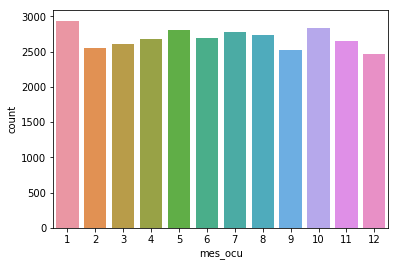

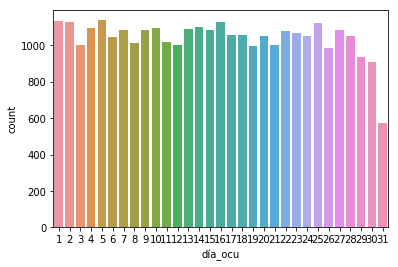

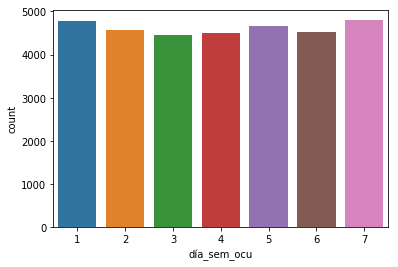

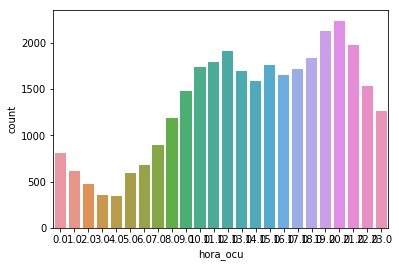

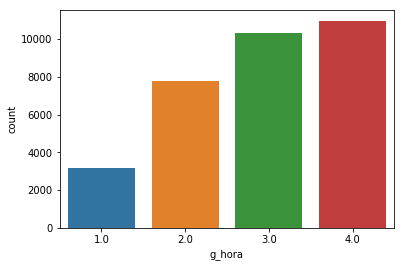

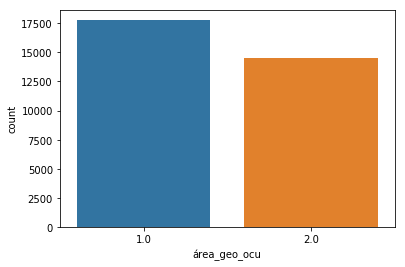

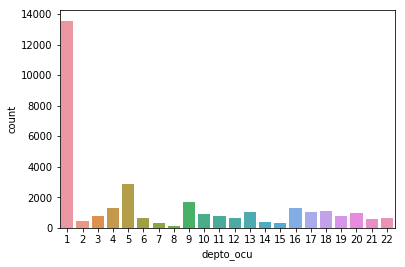

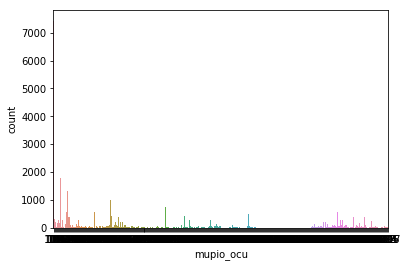

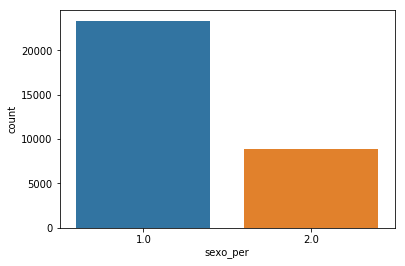

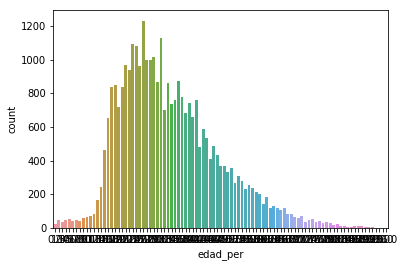

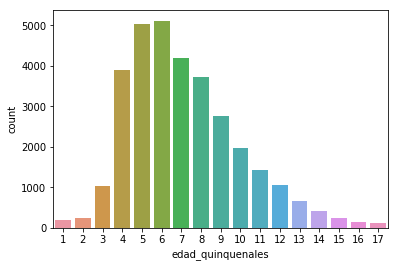

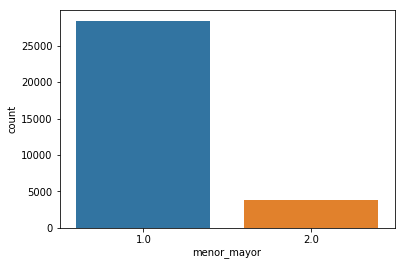

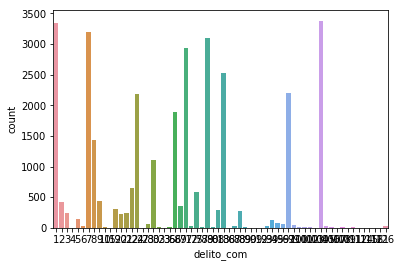

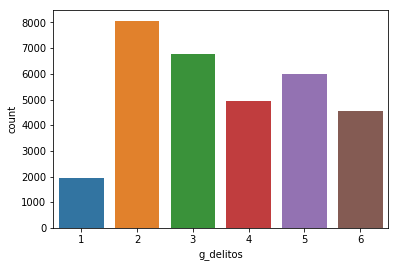

In [0]:
col = df.columns
for i in col:
    plt.figure(i)
    sns.countplot(df[i])

In [0]:
del_com = df["delito_com"].value_counts().reset_index(name='Sum of Incidents')[:11]
del_com

,index,Sum of Incidents
0,104,3379
1,1,3345
2,7,3192
3,79,3094
4,71,2929
5,83,2521
6,97,2208
7,24,2192
8,68,1897
9,8,1437


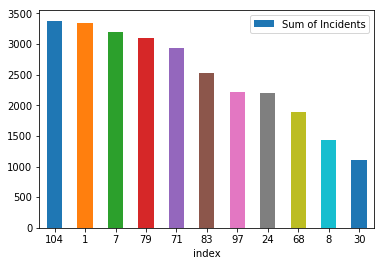

In [0]:
ax = del_com.plot.bar(x='index', y='Sum of Incidents', rot=0)

Delitos encontrados:
* 104 - Extorsión a residencias
* 1 - Homicidio por arma de fuego
* 7 - Lesiones por arma de fuego
* 79 - Hurto de motocicletas
* 71 - Desaparecidos
* 83 - Hurto de vehículos
* 97 - Extorsión a comercios
* 24 - Robo de motocicletas
* 68 - Otras causas (detenidos)
* 8 - Lesiones por arma blanca
* 30 - Robo a peatones

## Renombrando variables por tildes y facilidad

In [0]:
df.rename(columns={u'mes_ocu':'mes',
                          u'día_ocu':'dia',
                          u'día_sem_ocu':'dia_sem',
                          u'hora_ocu':'hora',
                          u'área_geo_ocu':'area',
                          u'depto_ocu':'dept',
                          u'mupio_ocu':'muni',
                          u'sexo_per':'sexo',
                          u'edad_per':'edad',                   
                          u'edad_quinquenales':'g_edad',                   
                          u'delito_com':'delito',                   
                          u'menor_mayor':'mayor_menor'}, 
                 inplace=True)

In [0]:
df.area = df.area.astype(int)
df.sexo = df.sexo.astype(int)
df.edad = df.edad.astype(int)
df.mayor_menor = df.mayor_menor.astype(int)
df.g_hora = df.g_hora.astype(int)
df.hora = df.hora.astype(int)

## Matriz de correlación


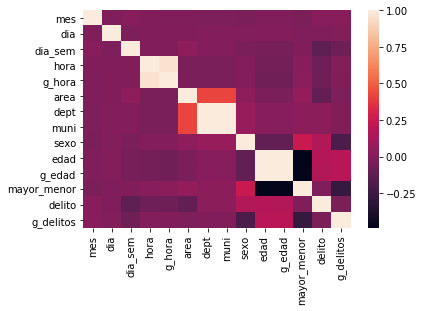

In [0]:
corr = df.corr()
sns.heatmap(corr)

In [0]:
df.g_delitos.unique()

array([4, 3, 1, 2, 6, 5])

## Generar el csv para el procesamiento y análisis. 

In [0]:
df.to_csv('vic_final.csv')

In [0]:
df = pd.read_csv('vic_final.csv')